This is a toy example of the use of Ball Mapper. We will start by constructing a collection of points sampled from a unit circle.

This notebook was prepared by Davide Gurnari. 

In [1]:
# uncomment and run this if you are on colab
# !pip install pyballmapper

In [2]:
import numpy as np
import pandas as pd
import networkx as nx

from matplotlib import pyplot as plt
%matplotlib inline

## Generate data

In [3]:
pointcloud = np.array([[np.cos(x), np.sin(x)] for x in np.arange(0, 6.3, 0.1)])
points_df = pd.DataFrame(pointcloud, columns=['x', 'y'])
points_df.head()

,x,y
0,1.000000,0.000000
1,0.995004,0.099833
2,0.980067,0.198669
3,0.955336,0.295520
4,0.921061,0.389418


In [4]:
angle_df = pd.DataFrame(np.arange(0, 6.3, 0.1), columns=['angle'])
angle_df

,angle
0,0.0
1,0.1
2,0.2
3,0.3
4,0.4
...,...
58,5.8
59,5.9
60,6.0
61,6.1


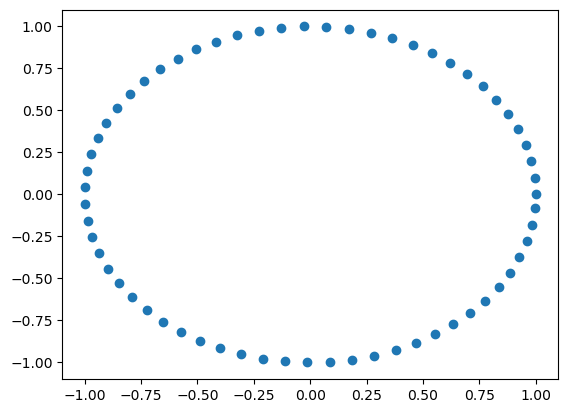

In [5]:
plt.scatter(points_df.x, points_df.y)
plt.show()

## Create BallMapper graph

In [6]:
from pyballmapper import BallMapper

In [7]:
bm = BallMapper(X = points_df.values, # the pointcloud, as a numpy array
                eps = 0.25)           # the radius of the balls

## Colored Ball Mapper graph

In [8]:
from matplotlib.colors import ListedColormap
from matplotlib import colormaps as cm

{}


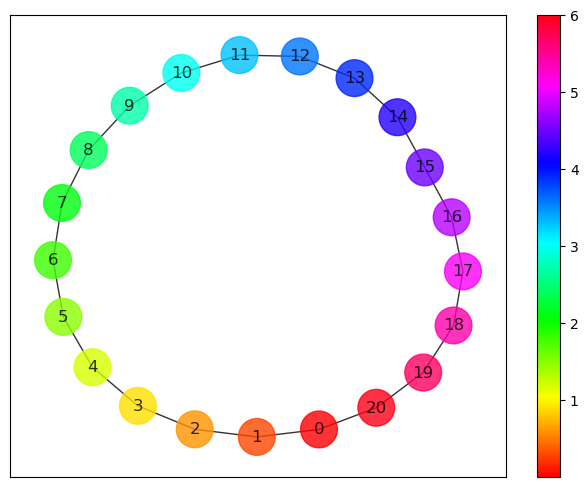

In [9]:
from scipy.stats import circmean

# we use the points themself as coloring functions
bm.add_coloring(coloring_df=angle_df, custom_function=circmean)

# we can color the graph by any column in coloring_df
# here we adopt a standard colour palette
my_palette = cm.get_cmap('hsv')

plt.figure(figsize= (8,6))
# The BallMapper class has a builtin plotting method, buit around nx.draw_networkx
bm.draw_networkx(coloring_variable='angle', color_palette=my_palette, colorbar=True)
plt.show()

In [10]:
from pyballmapper.plotting import _create_bokeh_graph

to_save = _create_bokeh_graph(bm.Graph, cm.get_cmap('Reds'))

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

## Fancy visualizations using KeplerMapper
wrapper around the `KeplerMapper.visualize` method

https://kepler-mapper.scikit-tda.org/en/latest/reference/stubs/kmapper.KeplerMapper.html#kmapper.KeplerMapper.visualize

you can install it via 
```
pip install kmapper
```

In [15]:
from pyballmapper.plotting import kmapper_visualize

## note that keplermapper supports as custom function only numpy functions
## so we cant use circmean :(

## https://kepler-mapper.scikit-tda.org/en/latest/reference/stubs/kmapper.KeplerMapper.html#kmapper.KeplerMapper.visualize

kmapper_visualize(bm, coloring_df=points_df,
                  path_html='output.html', title='Circle BallMapper',
                  colorscale=[[i, 'rgb'+str(cm.get_cmap('hsv')(i, bytes=True)[:3])] for i in np.linspace(0,1,10)])